In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
#Importing the datset
df = pd.read_csv('breast_cancer.csv')

In [3]:
#To know the number of rows and columns in the dataset
df.shape

(569, 32)

In [5]:
#To understand the statitical values of the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
#To display first 5 rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# Exploratory Data Analysis

In [7]:
#Finding missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
id,0,0.0
diagnosis,0,0.0
symmetry_worst,0,0.0
points_worst,0,0.0
concavity_worst,0,0.0
compactness_worst,0,0.0
smoothness_worst,0,0.0
area_worst,0,0.0
perimeter_worst,0,0.0
texture_worst,0,0.0


There are no missing data found in the analysis

In [8]:
#To understand the number of diagnosis in each of the groups B-Benign and M-Malignant
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\megha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

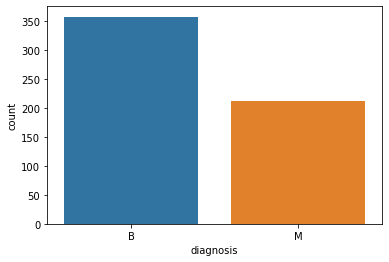

In [9]:
#To plot the value counts in each category of tumors
sns.countplot(df['diagnosis'],label="Count")

There seems to be higher number of benign tumors found compared to malignant tumors. Benign tumors are almost double that of malignant tumors

In [10]:
y = df.diagnosis #M or B
list = ['id','diagnosis']
X = df.drop(list,axis = 1 ) #creating a new variable to understand correlation
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'dimension_mean')])

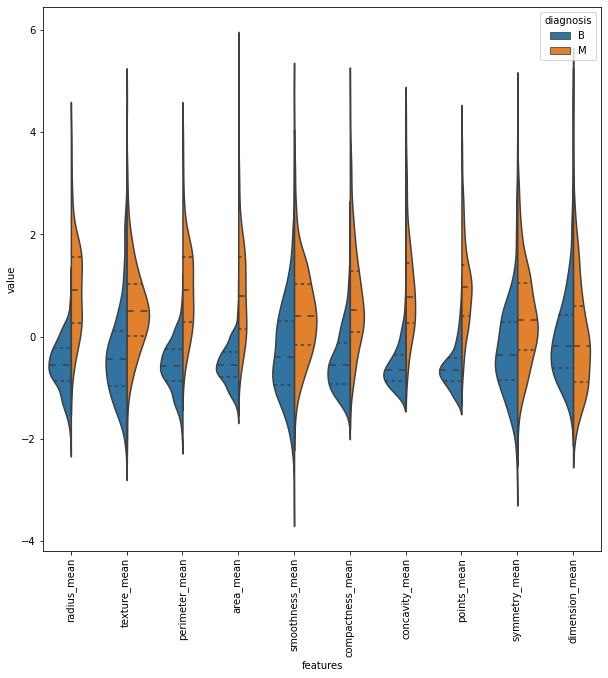

In [11]:
#Plot of the first ten features
data_diagnosis = y
data = X
data_std = (data - data.mean()) / (data.std())  #standardization
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

The median of the benign and malignant appears divided and distant from one another in the texture mean feature, making it useful for classification. The median of the Benign and Malignant, however, appears to be nearly identical in the fractal_dimension_mean feature, which may not be ideal for classification. It appears that the smoothness mean has the widest range of values.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'dimension_se')])

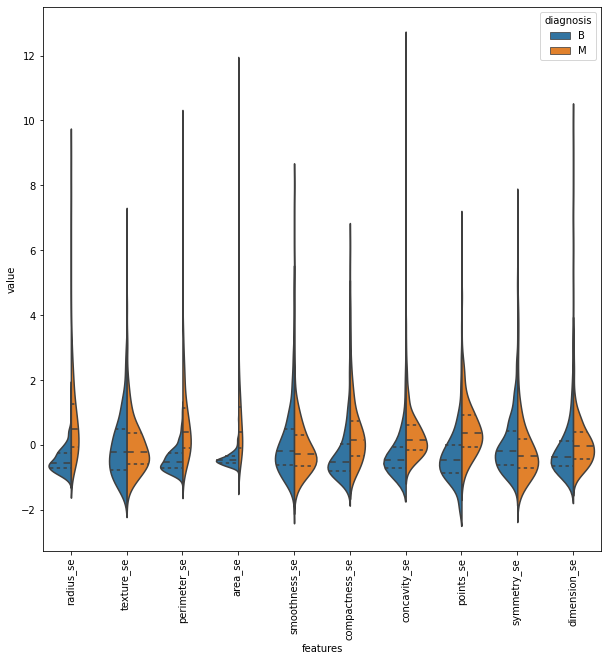

In [12]:
#Plot of the second ten features
data = pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Except for maybe concave points_se and concavity_se, medians don't differ much for other features. Almost the same distribution exists for smoothness_se and symmetry_se. i.e., classification may be challenging because the malignant and benign portions may not be clearly distinguished.The violin plot for area_se has a wrapped appearance. In area_se, the distribution of data points for benign and malignant conditions appears to fluctuate the greatest and looks extremely different.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'dimension_worst')])

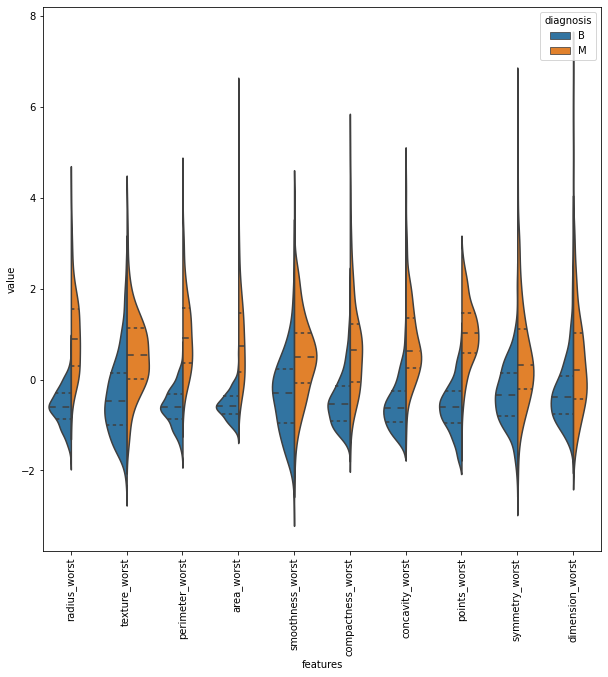

In [13]:
#Plot of the last ten features
data = pd.concat([y,data_std.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

area worst appears to be clearly divided, so using this attribute for classification may be easier. The data distribution for concavity_worst and concave_points_worst appears to be similar.

<AxesSubplot:>

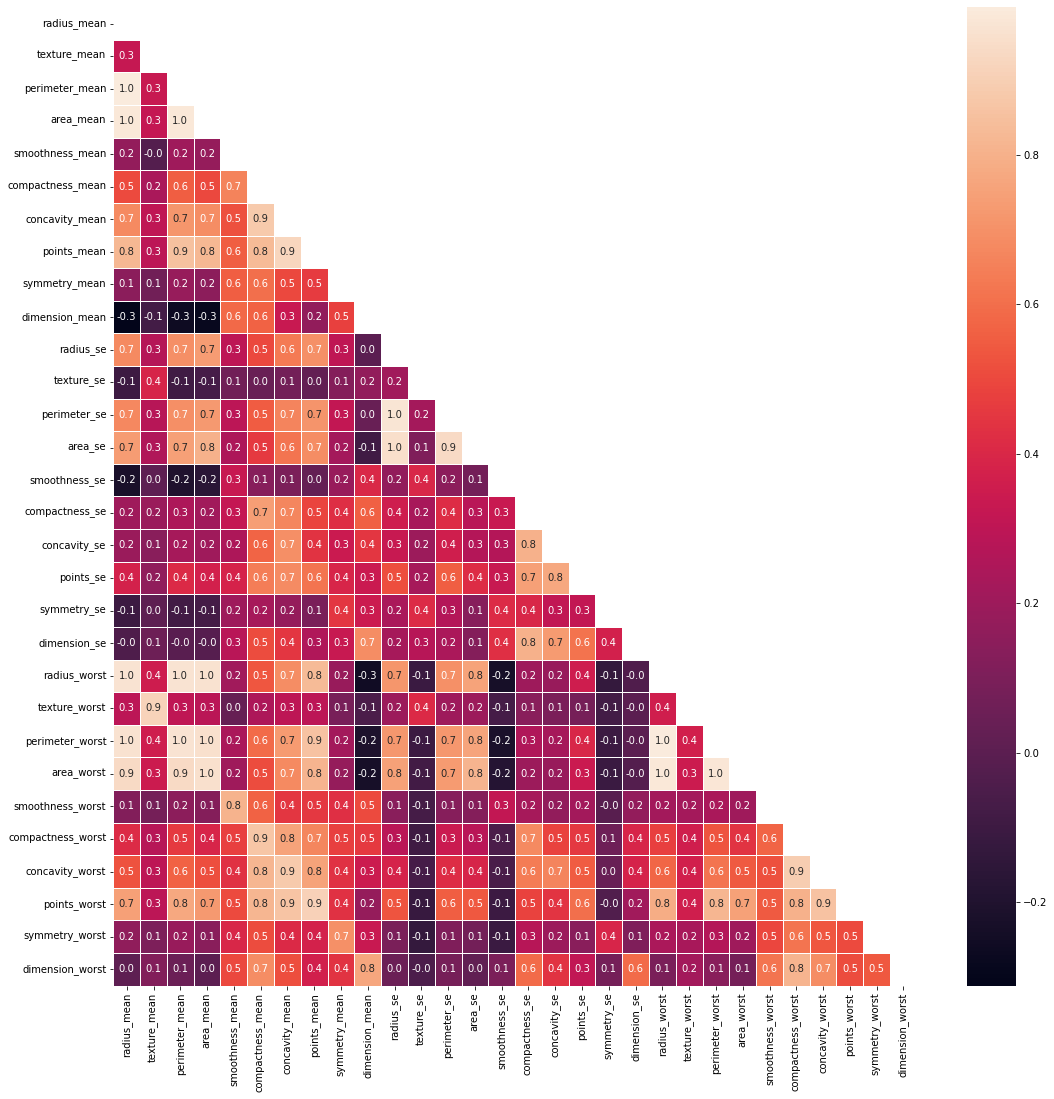

In [14]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

Variables with correlation of 1:
1. perimeter_mean, radius_mean and area_mean. So we choose radius_mean
2. perimeter_se, radius_se and area_se. So we choose radius_se
3. radius_worst, perimeter_worst, area_worst, radius_mean, perimeter_mean and area_mean. So we choose radius_mean

Variables with correlation of 0.9:
1. concavity_mean, points_mean, perimeter_mean, perimeter_worst, points_mean, compactness_worst, concavity_worst, points_worst and compactness_mean. So we choose concavity_mean
2. area_se, perimeter_se and radius_se. So we choose radius_se
3. texture_worst and texture_mean. So we choose texture_mean
4. area_worst, radius_mean and perimeter_mean. So we choose radius mean

In [15]:
# These rows are removed for ease of analysis
df.drop(axis=1,columns=['id','perimeter_mean','area_mean','perimeter_se','area_se','radius_worst','perimeter_worst','area_worst','compactness_mean','points_mean','texture_worst','compactness_worst','concavity_worst','points_worst'],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,smoothness_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,0.10280,0.03987,0.1959,0.05955,0.2360,0.6656,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,0.1385,0.2827,0.06771
1,B,10.60,18.95,0.09688,0.06387,0.1922,0.06491,0.4505,1.1970,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,0.1213,0.2940,0.07587
2,B,11.04,16.83,0.10770,0.03046,0.1714,0.06340,0.1967,1.3870,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,0.1369,0.2998,0.07881
3,B,11.28,13.39,0.11640,0.04635,0.1771,0.06072,0.3384,1.3430,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,0.1367,0.2102,0.06784
4,B,15.19,13.21,0.07963,0.03393,0.1721,0.05544,0.1783,0.4125,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,0.1126,0.2487,0.06766


# Label Encoding 

Label encoding is done to convert alphabetic information to numeric form for ease of computation. Here the diagnosis is given as B for benign and M for malignant. The label encoding done here has converted B into 0 and M into 1.

In [16]:
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])
df.head(10)

,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,smoothness_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,0.10280,0.03987,0.1959,0.05955,0.2360,0.6656,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,0.1385,0.2827,0.06771
1,0,10.60,18.95,0.09688,0.06387,0.1922,0.06491,0.4505,1.1970,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,0.1213,0.2940,0.07587
2,0,11.04,16.83,0.10770,0.03046,0.1714,0.06340,0.1967,1.3870,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,0.1369,0.2998,0.07881
3,0,11.28,13.39,0.11640,0.04635,0.1771,0.06072,0.3384,1.3430,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,0.1367,0.2102,0.06784
4,0,15.19,13.21,0.07963,0.03393,0.1721,0.05544,0.1783,0.4125,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,0.1126,0.2487,0.06766
5,0,11.57,19.04,0.08546,0.05485,0.2031,0.06267,0.2864,1.4400,0.007278,0.020470,0.04447,0.008799,0.01868,0.003339,0.1249,0.3035,0.08284
6,0,11.51,23.93,0.09261,0.11120,0.1388,0.06570,0.2388,2.9040,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,0.1298,0.2112,0.08732
7,1,13.81,23.75,0.13230,0.15580,0.2251,0.07421,0.5648,1.9300,0.008824,0.031080,0.03112,0.012910,0.01998,0.004506,0.2226,0.4432,0.10860
8,0,10.49,19.29,0.09989,0.02995,0.2217,0.06481,0.3550,1.5340,0.007595,0.022190,0.02880,0.008614,0.02710,0.003451,0.1219,0.2826,0.07552
9,0,11.06,14.96,0.10330,0.05397,0.1776,0.06907,0.1601,0.8225,0.007416,0.018770,0.02758,0.010100,0.02348,0.002917,0.1418,0.3301,0.09080


In [17]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis = 1)

# Cross Validation

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [19]:
models = []

models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier(n_estimators=100)))

In [20]:
# Train/Test split
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X, y, stratify = df.diagnosis, random_state=0)

In [21]:
#To understand which algorithm gives a better score
names = []
scores = []

for name, model in models:
    model.fit(X_train_cross, y_train_cross)
    y_pred_cross = model.predict(X_test_cross)
    scores.append(accuracy_score(y_test_cross, y_pred_cross))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.888112
1   DT  0.888112
2   RF  0.944056


In [22]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=None)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.878759
1   DT  0.905138
2   RF  0.950783


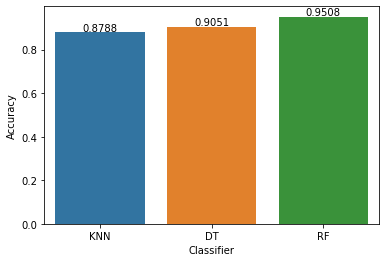

In [23]:
#Plot of the scores given by different algorithms
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

From the scores and the graph, it is clear that random forest algorithm gives the best accuracy. So random forest algorithm will be implemeneted to solve this problem in the following steps.

# Train-test split

In [24]:
#Splitting test and train data for Random Forest Classfier implimentation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Random Forest model

In [25]:
#Fitting the training dataset into the random forest classifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [26]:
#Predicting the output using the test dataset and producing the F1 score to evaluate the accuracy of the algorithm
from sklearn.metrics import f1_score
pred = rf.predict(X_test)
print('Test data score: ',f1_score(y_test,pred))

Test data score:  0.975609756097561


Conclusion

I have validated the accuracy for KNN, decision tree and random forest algorithms and found that random forest gives the best results. Random forest algorithm was implemented and a score of 0.927 was obtained